In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('train.csv')
df

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


/tmp/ipykernel_20059/2860455260.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = df_grouped.resample('M').sum()[:-1]


<Axes: xlabel='date'>

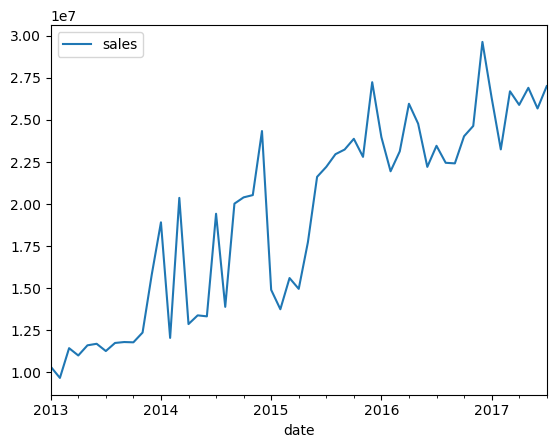

In [4]:
# Clean and visualize data
df_grouped = df[['date', 'sales']].groupby('date').sum()
df_grouped.index = pd.to_datetime(df_grouped.index, format="%Y-%m-%d")
data = df_grouped.resample('M').sum()[:-1]
data.plot()

In [5]:
# Split into training and testing sets
train_data = data.sales[:-12]
test_data = data.sales[-12:]

## Seasonal Decompose

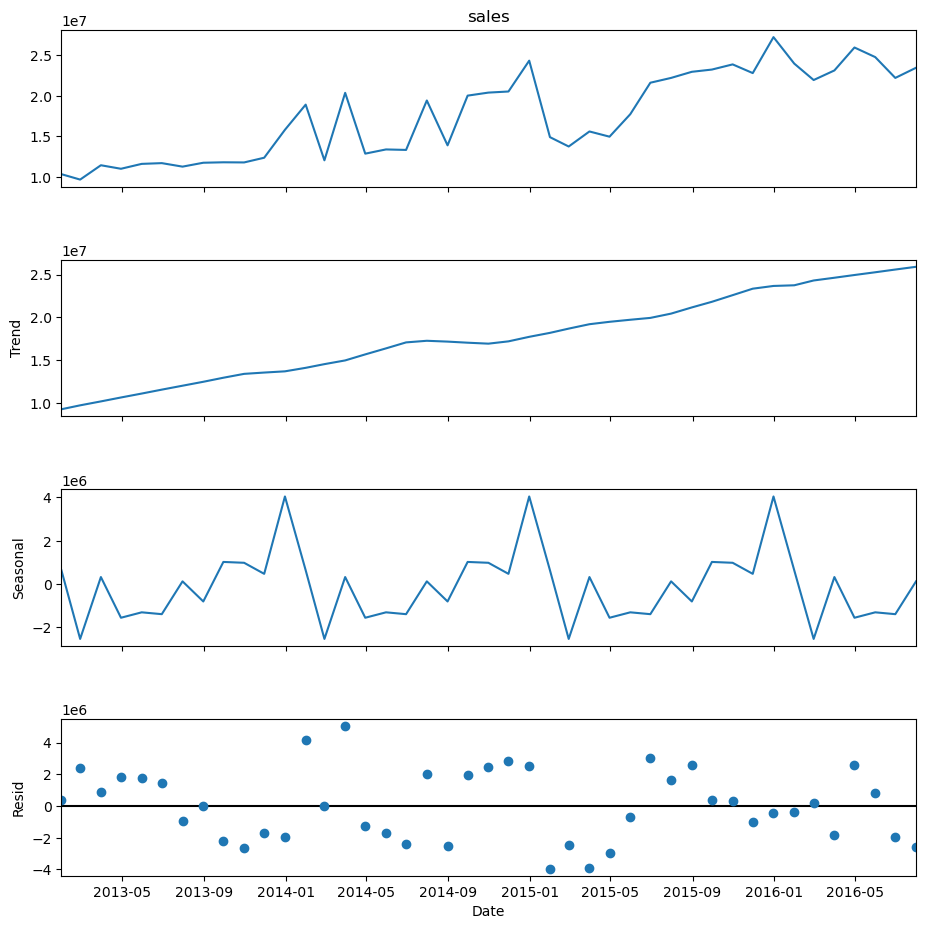

In [6]:
# Import library
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Decompose data by selecting the appropiate frequency
decomp = sm.tsa.seasonal_decompose(
  train_data, period=12,extrapolate_trend=True)
decomp_plot = decomp.plot()

# Plot outcome
plt.xlabel('Date')
decomp_plot.set_figheight(10)
decomp_plot.set_figwidth(10)
plt.show()

## STL forecast

In [7]:
import pandas as pd
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.arima.model import ARIMA

# Decompose the time series with STL
stl = STL(train_data, seasonal=13)
result = stl.fit()


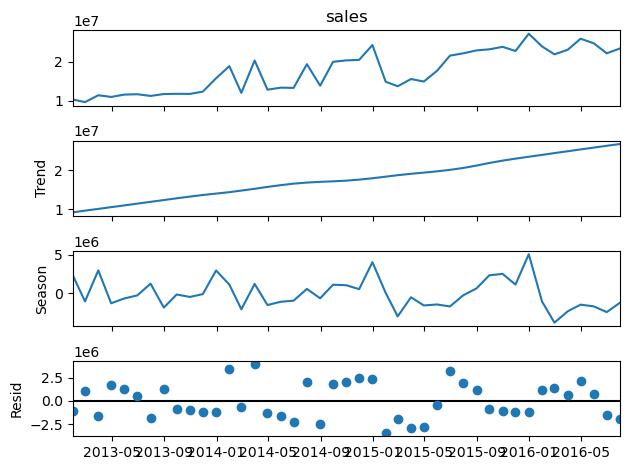

In [8]:
# Display decomposition
result.plot()
plt.show()

In [9]:
# Function to forecast the seasonal component based on the extracted seasonality
def forecast_seasonal_component(result, steps, seasonal_period):
    # Repeat the seasonal component
    seasonal_component = np.tile(result.seasonal[-12:], steps // 12)

    # If steps is not a multiple of 12, add the remaining months
    if steps % 12:
        seasonal_component = np.concatenate([seasonal_component, result.seasonal[-12:-12+steps%12]])

    return seasonal_component 

In [10]:
# Deseasonalize the time series
deseasonalized = train_data - result.seasonal

In [11]:
# Forecast deseasonalized data

# Install the pmdarima if you don't have it - uncomment line
!pip install pmdarima==2.0.3

# Import the library
from pmdarima.arima import auto_arima

# Build and fit the AutoARIMA model
model = auto_arima(deseasonalized, seasonal=False, suppress_warnings=True)
model.fit(deseasonalized)

# Check the model summary
model.summary()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 11.8 MB/s eta 0:00:0031m15.3 MB/s eta 0:00:01
  Attempting uninstall: pmdarima
    Found existing installation: pmdarima 2.0.4
    Uninstalling pmdarima-2.0.4:
      Successfully uninstalled pmdarima-2.0.4

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


/home/son/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/son/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/son/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/son/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/son/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   43
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -674.970
Date:                Mon, 26 May 2025   AIC                           1355.940
Time:                        11:10:36   BIC                           1361.153
Sample:                    01-31-2013   HQIC                          1357.851
                         - 07-31-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.625e+05   2.03e+05      2.767      0.006    1.64e+05    9.61e+05
ma.L1         -0.4412      0.160     -2.751      0.006      -0.756      -0.127
sigma2      5.266e+12      0.000   1.98e+16      0.000    5.27e+12    5.27e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.41   Jarque-Bera (JB):                 0.17
Prob(Q):                              0.52   Prob(JB):                         0.92
Heteroskedasticity (H):               0.55   Skew:                             0.16
Prob(H) (two-sided):                  0.28   Kurtosis:                         2.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.52e+34. Standard errors may be unstable.
"""

In [12]:
# Make predictions
predictions = model.predict(n_periods=12)

# Format as dataframe
predictions = predictions.to_frame(name='predictions')

# Forecast seasonal component
seasonal_forecast =  forecast_seasonal_component(result, 12, 12)

/home/son/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [13]:
# Add index and column name to seasonal forecast array
seasonal_forecast = pd.DataFrame(seasonal_forecast, index=test_data.index, columns=['predictions'])

In [14]:
# Add the seasonal component back in
predictions.predictions += seasonal_forecast.predictions

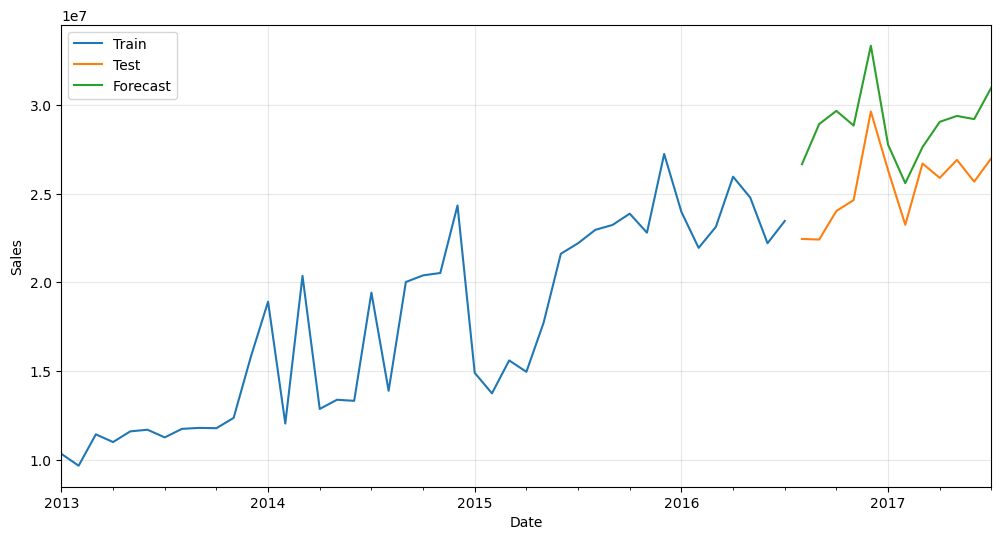

In [15]:
ax = train_data.plot(figsize=(12,6))
test_data.plot(ax=ax)
predictions.predictions.plot(ax=ax)
plt.grid(alpha=0.3)
plt.legend(['Train', 'Test', 'Forecast'])
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

## Straightforward method using STLForecast

In [16]:
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA

# Fit data
stlf = STLForecast(train_data, ARIMA, model_kwargs={"order": (0, 1, 1)})
model = stlf.fit()
forecasts = model.forecast(steps=12)

# `forecasts` now contains the reseasonalized forecast

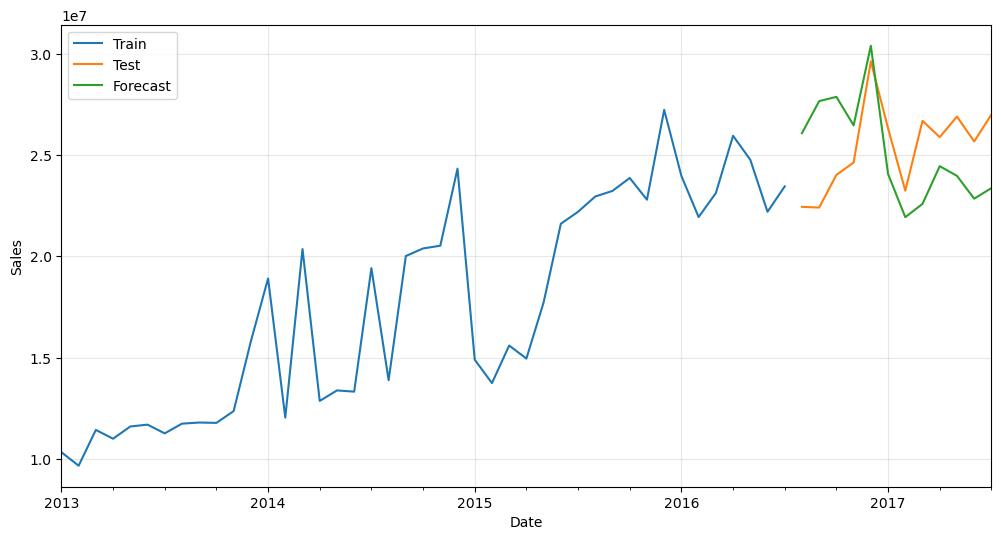

In [17]:
ax = train_data.plot(figsize=(12,6))
test_data.plot(ax=ax)
forecasts.plot(ax=ax)
plt.grid(alpha=0.3)
plt.legend(['Train', 'Test', 'Forecast'])
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()